# Routing 101

In this tutorial, we will show how to connect two points with a transmission line route.

### Introduction

Routes are strips of metal (or cuts in the bulk metal), that electrically connect two input-specified pins (pin = point on the perimeter of a QComponent, with orientation, indicating an allowed point for electrical contact).

The core class `QRoute` is designed to support different route types, currently only single or double (CPW) wiring. We will use the CPW transmission line in the remainder of this notebook, and in the majority of the other tutorial notebooks.

`QRoute` inherits the generic `QComponent`. QRoute also has two attributes of type `QRouteLead`, which enable close control of the start and end points in a route. We will describe in this notebook how to utilize the `QRouteLead`. `QRoutePoint` is a convenient exchange format for directed points.

`QRoute` is an abstract class, without a `make()` method, thus cannot be instantiated as a design component. `QRoute` is inherited by classes that can be instantiated (have a `make()` method - blue highlights in the image below). By subclassing further, you can implement comprehensive routing algorithms, such as the `RouteMixed`.

In this notebook we will only look at the simple `RouteStraight` and `RouteLead`.

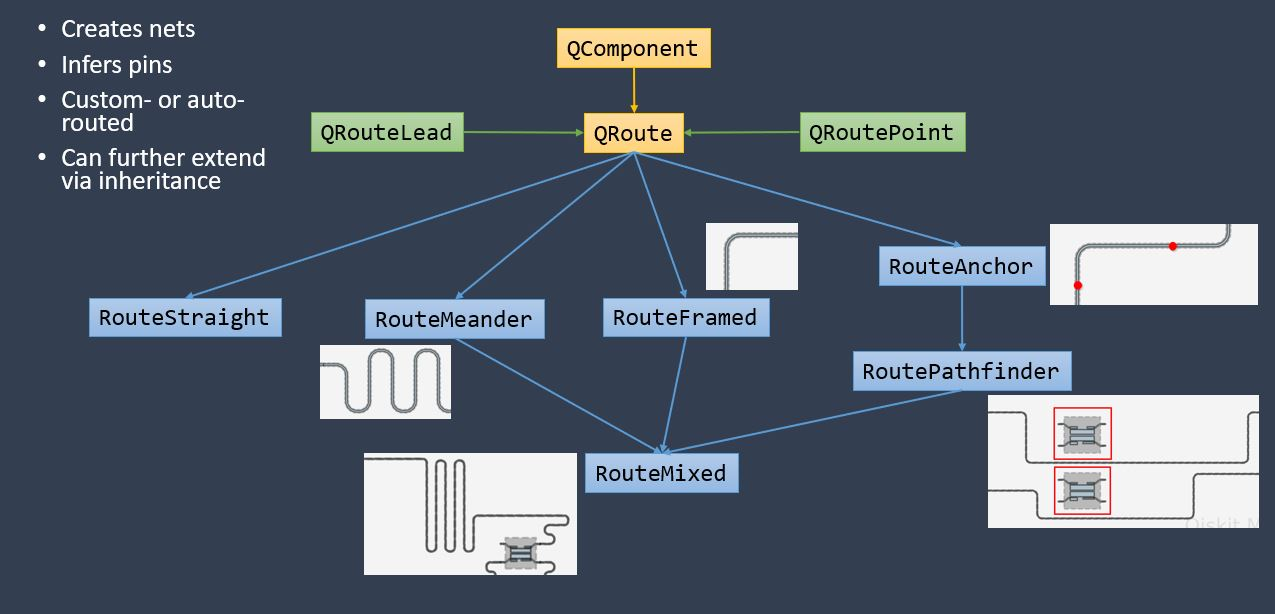

### Prerequisite

Initialize metal

In [ ]:
%reload_ext autoreload
%autoreload 2

In [ ]:
from qiskit_metal import designs
from qiskit_metal import MetalGUI, Dict

design = designs.DesignPlanar()
gui = MetalGUI(design)

design.variables['cpw_width'] = '10 um'
design.variables['cpw_gap'] = '6 um'

In [ ]:
# enable rebuild of the same component
design.overwrite_enabled = True

We will use the following classes in the notebook. Let's import all of them at once.

In [ ]:
# for pins:
from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
# for routing:
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
# for jogs:
from collections import OrderedDict

To remove the complexity of large QComponents, we will only use the `OpenToGround` QComponent to establish pins. We want to initialize a dictionary of type `Dict` as follows (naming matching `Example 1`). We will later update this dictionary as needed using the simpler dot notation.

In [ ]:
pin_opt = Dict(pin_inputs=Dict(start_pin=Dict(
                                    component='open1i',
                                    pin='open'),
                                end_pin=Dict(
                                    component='open1o',
                                    pin='open')))

## Example 1: Straight routing between two pins
First, we make sure our design contains two pins to connect to.

In [ ]:
design.delete_all_components()  #needed only for rebuilds. will get a warning

otg11 = OpenToGround(design, 'open1i', options=dict(pos_x='0mm',  pos_y='1mm', orientation='180'))
otg12 = OpenToGround(design, 'open1o', options=dict(pos_x='0.5mm',  pos_y='1mm', orientation='0'))

gui.rebuild()
gui.autoscale()

Then we create the route in between them. Notice we are using the previously defined `pin_opt` to indicate which pins to connect to.

In [ ]:
route1 = RouteStraight(design, 'cpw_1', pin_opt)

gui.rebuild()
gui.autoscale()
gui.highlight_components(['open1i','open1o'])
#gui.screenshot()

## Example 2: Any direction
Let's add a few pins that we can use to connect in pairs. We here align them following a variety of orientations.

In [ ]:
otg21 = OpenToGround(design, 'open2i', options=dict(pos_x='0mm',  pos_y='2mm', orientation='90'))
otg22 = OpenToGround(design, 'open2o', options=dict(pos_x='0mm',  pos_y='1.5mm', orientation='-90'))
otg31 = OpenToGround(design, 'open3i', options=dict(pos_x='0.35mm',  pos_y='1.55mm', orientation='45'))
otg32 = OpenToGround(design, 'open3o', options=dict(pos_x='0mm',  pos_y='1.2mm', orientation='-135'))
otg41 = OpenToGround(design, 'open4i', options=dict(pos_x='0mm',  pos_y='0.8mm', orientation='135'))
otg42 = OpenToGround(design, 'open4o', options=dict(pos_x='0.35mm',  pos_y='0.45mm', orientation='-45'))

gui.rebuild()
gui.autoscale()

Then we connect pair of pins using a straight route. Notice how we update the `pin_opt` component names to the new pair, for each new `RouteStraight`. Indeed, we can only use a pin for one single connection, and we will get an error if we try to connect a second route to the same pin.

In [ ]:
pin_opt.pin_inputs.start_pin.component = 'open2i'
pin_opt.pin_inputs.end_pin.component = 'open2o'
route2 = RouteStraight(design, 'cpw_2', pin_opt)
pin_opt.pin_inputs.start_pin.component = 'open3i'
pin_opt.pin_inputs.end_pin.component = 'open3o'
route3 = RouteStraight(design, 'cpw_3', pin_opt)
pin_opt.pin_inputs.start_pin.component = 'open4i'
pin_opt.pin_inputs.end_pin.component = 'open4o'
route4 = RouteStraight(design, 'cpw_4', pin_opt)

gui.rebuild()
gui.autoscale()

## Example 3: Angles and leads
If the two pins to connect are not facing each other, the router will create the necessary jogs. Here is a simple example that shows 45° jogs.

The `RouteStraight` will use a single straight line in any orientation to connect the two pins. Feel free to try using other algorithms, by replacing the class to any other `QRoute` subclass (image at the start of this notebook).

In [ ]:
otg51 = OpenToGround(design, 'open5i', options=dict(pos_x='0.7mm',  pos_y='1.9mm', orientation='180'))
otg52 = OpenToGround(design, 'open5o', options=dict(pos_x='0.8mm',  pos_y='2.0mm', orientation='90'))

pin_opt.pin_inputs.start_pin.component = 'open5i'
pin_opt.pin_inputs.end_pin.component = 'open5o'
route5 = RouteStraight(design, 'cpw_5', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_5'])
#gui.screenshot()

Let's make another connection. This time, we add a lead extension to both pins. An extension is a route segment that begins from the pin coordinates and extends straight in the pin direction by the given length.

In [ ]:
otg61 = OpenToGround(design, 'open6i', options=dict(pos_x='0.7mm',  pos_y='1.7mm', orientation='180'))
otg62 = OpenToGround(design, 'open6o', options=dict(pos_x='0.8mm',  pos_y='1.8mm', orientation='90'))

pin_opt.pin_inputs.start_pin.component = 'open6i'
pin_opt.pin_inputs.end_pin.component = 'open6o'

pin_opt.lead.start_straight = '0.04mm'
pin_opt.lead.end_straight = '0.06mm'
route6 = RouteStraight(design, 'cpw_6', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_6'])
#gui.screenshot()

## Example 4: 90° angles
In most applications, you might want to limit the jogs to 90° angles. In the following example we use the same `pin_opts` of the previous example, but we replace `RouteStraight` with `RouteFramed`. You will notice that our route now has only one 90° jog.

In [ ]:
otg71 = OpenToGround(design, 'open7i', options=dict(pos_x='0.7mm',  pos_y='1.5mm', orientation='180'))
otg72 = OpenToGround(design, 'open7o', options=dict(pos_x='0.8mm',  pos_y='1.6mm', orientation='90'))

pin_opt.pin_inputs.start_pin.component = 'open7i'
pin_opt.pin_inputs.end_pin.component = 'open7o'

route7 = RouteFramed(design, 'cpw_7', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_7'])
#gui.screenshot()

The route resulting from the cell above, had no trace of the lead segments. That is because the length of the lead segments was less than the edge of the corner. By extending the `start_straight` for example, we can see the effect of the lead again.

In [ ]:
otg81 = OpenToGround(design, 'open8i', options=dict(pos_x='0.7mm',  pos_y='1.3mm', orientation='180'))
otg82 = OpenToGround(design, 'open8o', options=dict(pos_x='0.8mm',  pos_y='1.4mm', orientation='90'))

pin_opt.pin_inputs.start_pin.component = 'open8i'
pin_opt.pin_inputs.end_pin.component = 'open8o'

pin_opt.lead.start_straight = '0.15mm'
pin_opt.lead.end_straight = '0.05mm'
route8 = RouteFramed(design, 'cpw_8', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_8'])

Notice how the `RouteFramed` executed in the previous cell needs to create 2 jogs to complete the routing, as opposed to the previous single 90° job example.

This algorithm helps also connecting pins not facing each other, like in the next cell.

In [ ]:
otg91 = OpenToGround(design, 'open9i', options=dict(pos_x='0.7mm',  pos_y='1.05mm', orientation='180'))
otg92 = OpenToGround(design, 'open9o', options=dict(pos_x='0.8mm',  pos_y='1.15mm', orientation='270'))

pin_opt.pin_inputs.start_pin.component = 'open9i'
pin_opt.pin_inputs.end_pin.component = 'open9o'

route9 = RouteFramed(design, 'cpw_9', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_9'])
#gui.screenshot()

The `RouteFramed` can create up to 3 segments. Observe the following case of opposing pins.

In [ ]:
otg101 = OpenToGround(design, 'open10i', options=dict(pos_x='0.7mm',  pos_y='0.8mm', orientation='90'))
otg102 = OpenToGround(design, 'open10o', options=dict(pos_x='0.8mm',  pos_y='0.9mm', orientation='270'))

pin_opt.pin_inputs.start_pin.component = 'open10i'
pin_opt.pin_inputs.end_pin.component = 'open10o'

pin_opt.lead.start_straight = '0.03mm'
pin_opt.lead.end_straight = '0.03mm'
route10 = RouteFramed(design, 'cpw_10', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_10'])
#gui.screenshot()

## Example 5: Tight control on leads and angles
`QRouteLeads` are a "stack" of points that describe in detail the "last-mile" to the pins where the route terminates. These stacks are seeded with the pin coordinates and direction and build incrementally.

In the previous examples we controlled the QRouteLead points by utilizing the `lead` options inside the `pin_opt` construct. Specifically, we utilized `start_straight` and `end_straight`, which add one point to the respective leads, at the specified distance in the direction specified by the pins (outwards from the QComponent that has the pin).

We are however not limited to a single aligned extension point. Utilizing the `start_jogged_extension` and `end_jogged_extension`, we can specify any number of points to add to the lead stacks. The points are computed by providing a OrderedDict() of **steps**, expressed as `[angle,distance]` pairs.
* `distance` is the string describing how long the step needs to be
* `angle` describe the direction in which to take the step

The `angle` can be described in several ways, to accommodate different coding styles. For example, all of the options above will lead to the same 90° left turn:
> "L", "L90", "R-90", 90, "90", "A,90", "left", "left90", "right-90"

In [ ]:
otg111 = OpenToGround(design, 'open11i', options=dict(pos_x='0.7mm',  pos_y='0.5mm', orientation='180'))
otg112 = OpenToGround(design, 'open11o', options=dict(pos_x='0.8mm',  pos_y='0.6mm', orientation='270'))

pin_opt.pin_inputs.start_pin.component = 'open11i'
pin_opt.pin_inputs.end_pin.component = 'open11o'

# the first step is always stright, let's define by how much (minimum is half the route width):
pin_opt.lead.start_straight = '0.03mm'
pin_opt.lead.end_straight = '0.04mm'

# any subsequent step of the lead_start
jogsS = OrderedDict()
jogsS[0] = ["L", '20um']
jogsS[1] = ["R", '50um']
jogsS[2] = [90, '30um']
jogsS[3] = [-90, '60um']
jogsS[4] = ["90", '40um']
jogsS[5] = ["-90", '70um']
jogsS[6] = ["L30", '30um']
jogsS[7] = ["A,30", '30um']
jogsS[8] = ["left30", '50um']

# single jog on the lead_end, just for kicks
jogsE = OrderedDict()
jogsE[0] = ["L", '30um']

pin_opt.lead.start_jogged_extension = jogsS
pin_opt.lead.end_jogged_extension = jogsE
route10 = RouteFramed(design, 'cpw_11', pin_opt)

gui.rebuild()
gui.zoom_on_components(['cpw_11'])
#gui.screenshot()

This notebook explains the basics of `QRoute`, illustrating **custom** methods to route. In this same tutorial folder you will find other notebooks describing the use of more automated routing options:
* `RouteMeader` to obtain a routing of an exact length
* `RoutePathfinder` to circumvent existing layout obstacles
* `RouteAnchors` to guarantee routing through a given set of non-oriented points
* `RouteMixed` to be able to specify what other auto-route algorithm to use in between each pair of anchors

In [ ]:
gui.autoscale()

In [ ]:
# gui.main_window.close()